## Ayuda -> Caso_Muerte_Coronaria_2023

In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split

In [2]:
datos= pd.read_csv('https://raw.githubusercontent.com/profcarlosamartinez/mineria_datos/main/datos_m_coronaria_2023/datos_train_test_sh.csv',delimiter=',',decimal='.')

In [4]:
datos.head(3)

,id,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,clase
0,0,154,4.50,4.75,23.52,Present,43,25.76,0.0,53,1
1,1,124,1.04,2.84,16.42,Present,46,20.17,0.0,61,0
2,2,148,12.20,3.79,34.15,Absent,57,26.38,14.4,57,1


In [5]:
datos.shape

(346, 11)

In [6]:
datos.clase.value_counts()

0    226
1    120
Name: clase, dtype: int64

In [7]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         346 non-null    int64  
 1   sbp        346 non-null    int64  
 2   tobacco    346 non-null    float64
 3   ldl        346 non-null    float64
 4   adiposity  346 non-null    float64
 5   famhist    346 non-null    object 
 6   typea      346 non-null    int64  
 7   obesity    346 non-null    float64
 8   alcohol    346 non-null    float64
 9   age        346 non-null    int64  
 10  clase      346 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 29.9+ KB


Análisis de los datos

Text(3.674999999999997, 0.5, 'Count')

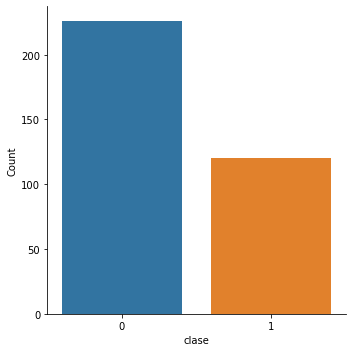

In [14]:
import seaborn as sb
from matplotlib import pyplot as plt

#Lo anterior con un gráfico de barras.
sb.catplot(x='clase', kind='count', data=datos) 
plt.xlabel("clase") 
plt.ylabel("Count") 

In [15]:
datos.describe()

,id,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,clase
count,346.00000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000
mean,172.50000,138.728324,3.754017,4.707775,25.247023,53.242775,26.094827,16.886301,42.878613,0.346821
std,100.02583,20.726547,4.798576,2.025187,7.678176,9.939178,4.352383,23.741244,14.614753,0.476647
min,0.00000,102.000000,0.000000,0.980000,7.120000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,86.25000,124.000000,0.072500,3.240000,19.975000,47.000000,22.752500,0.510000,32.000000,0.000000
50%,172.50000,134.000000,2.000000,4.340000,25.955000,53.000000,25.830000,7.455000,45.000000,0.000000
75%,258.75000,149.500000,5.582500,5.662500,30.885000,60.000000,28.507500,24.187500,56.000000,1.000000
max,345.00000,218.000000,31.200000,14.160000,42.490000,78.000000,46.580000,147.190000,64.000000,1.000000


Número de datos ausentes por variable

In [16]:
datos.isna().sum().sort_values()

id           0
sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
clase        0
dtype: int64

- Aplicamos One-Hot Encoding cuando:

    La característica categórica no es ordinal
    El número de características categóricas es menor, por lo que puede aplicarse eficazmente la codificación de una sola vez. Se puede usar pandas con pd.get_dummies o from sklearn.preprocessing import OneHotEncoder.

In [8]:
# Get list of categorical variables
s = (datos.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['famhist']


In [8]:
# Usando OneHotEncoder de sklearn
# Para pasar variables categóricas nominales a números
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
oh_array = ohe.fit_transform(datos['famhist'].values.reshape(-1, 1)).toarray()
oh_df = pd.DataFrame(oh_array,columns=['famhist_Absent','famhist_Present'])
df=pd.concat([datos,oh_df],axis=1)
df.head(5)

#Otra forma de hacer OneHotEncoder
# dummies = pd.get_dummies(datos[['famhist']])
# datos.drop(['famhist'],axis=1)
# df = pd.concat([datos, dummies],axis=1)
# df.head(2)

,id,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,clase,famhist_Absent,famhist_Present
0,0,154,4.50,4.75,23.52,Present,43,25.76,0.00,53,1,0.0,1.0
1,1,124,1.04,2.84,16.42,Present,46,20.17,0.00,61,0,0.0,1.0
2,2,148,12.20,3.79,34.15,Absent,57,26.38,14.40,57,1,1.0,0.0
3,3,110,4.64,4.55,30.46,Absent,48,30.90,15.22,46,0,1.0,0.0
4,4,164,0.50,6.95,39.64,Present,47,41.76,3.81,46,1,0.0,1.0


In [9]:
datos = df.reindex(columns=['id','sbp','tobacco','ldl','adiposity','typea','famhist_Absent','famhist_Present','obesity','alcohol','age','clase'])
datos.head(2)

,id,sbp,tobacco,ldl,adiposity,typea,famhist_Absent,famhist_Present,obesity,alcohol,age,clase
0,0,154,4.50,4.75,23.52,43,0.0,1.0,25.76,0.0,53,1
1,1,124,1.04,2.84,16.42,46,0.0,1.0,20.17,0.0,61,0


In [10]:
X=datos.iloc[:,0:11]
X.head(4)

,id,sbp,tobacco,ldl,adiposity,typea,famhist_Absent,famhist_Present,obesity,alcohol,age
0,0,154,4.50,4.75,23.52,43,0.0,1.0,25.76,0.00,53
1,1,124,1.04,2.84,16.42,46,0.0,1.0,20.17,0.00,61
2,2,148,12.20,3.79,34.15,57,1.0,0.0,26.38,14.40,57
3,3,110,4.64,4.55,30.46,48,1.0,0.0,30.90,15.22,46


In [11]:
y=datos.iloc[:,11:12]
y.head(4)

,clase
0,1
1,0
2,1
3,0


In [12]:
from sklearn.neighbors import KNeighborsClassifier

modelo_knn = KNeighborsClassifier(n_neighbors=3)

In [13]:
modelo_knn.fit(X,np.ravel(np.array(y)))

KNeighborsClassifier(n_neighbors=3)

**Leer nuevas instancias a predecir**

In [14]:
nuevas_instancias= pd.read_csv('https://raw.githubusercontent.com/profcarlosamartinez/mineria_datos/main/datos_m_coronaria_2023/nuevas_instancias_a_predecir.csv',delimiter=';',decimal='.')

In [15]:
ohe = OneHotEncoder()
oh_array = ohe.fit_transform(nuevas_instancias['famhist'].values.reshape(-1, 1)).toarray()
oh_df1 = pd.DataFrame(oh_array,columns=['famhist_Absent','famhist_Present'])
df1=pd.concat([nuevas_instancias,oh_df1],axis=1)
df1.head(2)

#Otra forma de hacer OneHotEncoder
#dummies = pd.get_dummies(nuevas_instancias[['famhist']])
#nuevas_instancias.drop(['famhist'],axis=1)
#df1 = pd.concat([nuevas_instancias, dummies],axis=1)

nuevas_instancias = df1.reindex(columns=['id','sbp','tobacco','ldl','adiposity','typea','famhist_Absent','famhist_Present','obesity','alcohol','age'])
nuevas_instancias.head(2)

,id,sbp,tobacco,ldl,adiposity,typea,famhist_Absent,famhist_Present,obesity,alcohol,age
0,1,132,0.0,4.17,36.57,57,1.0,0.0,30.61,18.00,49
1,2,124,1.8,3.74,16.64,42,0.0,1.0,22.26,10.49,20


In [16]:
prediccion_nuevos_individuos=modelo_knn.predict(nuevas_instancias)

In [17]:
datos_clasificados=pd.DataFrame(prediccion_nuevos_individuos)

In [18]:
datos_clasificados.index = datos_clasificados.index + 1

In [19]:
datos_clasificados.columns = ['Predicted']
datos_clasificados.index.names = ['id']

In [20]:
datos_clasificados.columns

Index(['Predicted'], dtype='object')

In [21]:
datos_clasificados.head(2)

,Predicted
id,
1,1
2,0


In [22]:
from google.colab import files

In [23]:
datos_clasificados.to_csv('predicted.csv',sep=',')
files.download('predicted.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>